# Exploratory Data Analysis

*Preparing data for modeling*

The problem was taken from the website: https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDS0105ENSkillsNetwork20083975-2021-01-01

## 1. Montando o disco do google drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 2. Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

## 3. Importing the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Portfólio/car_problem.csv')

In [ ]:
data.head(4)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450


In [ ]:
data.tail(4)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## 4. Verifying the types of data

In [ ]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## 5. Dropping out the columns that will not be used

In [ ]:
data = data.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)

In [ ]:
data.head(4)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450


## 6. Renaming columns 

In [ ]:
data = data.rename(columns = {'Engine HP':'HP','Engine Cylinders': 'Cylinders', 'Transmission type':'Transmission', 'Driven_Wheels':'Drive mode', 'highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price'})

In [ ]:
data.head(3)

,Make,Model,Year,HP,Cylinders,Transmission Type,Drive mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350


## 7. Removing duplicated cells

In [ ]:
data.shape

(11914, 10)

In [ ]:
duplicate_rows = data[data.duplicated()]

In [ ]:
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (989, 10)


In [ ]:
data.count()

Make                 11914
Model                11914
Year                 11914
HP                   11845
Cylinders            11884
Transmission Type    11914
Drive mode           11914
MPG-H                11914
MPG-C                11914
Price                11914
dtype: int64

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.count()

Make                 10925
Model                10925
Year                 10925
HP                   10856
Cylinders            10895
Transmission Type    10925
Drive mode           10925
MPG-H                10925
MPG-C                10925
Price                10925
dtype: int64

## 8. Dropping the missing or null values

In [ ]:
data.isnull().sum()

Make                  0
Model                 0
Year                  0
HP                   69
Cylinders            30
Transmission Type     0
Drive mode            0
MPG-H                 0
MPG-C                 0
Price                 0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
HP                   0
Cylinders            0
Transmission Type    0
Drive mode           0
MPG-H                0
MPG-C                0
Price                0
dtype: int64

In [ ]:
data.count()

Make                 10827
Model                10827
Year                 10827
HP                   10827
Cylinders            10827
Transmission Type    10827
Drive mode           10827
MPG-H                10827
MPG-C                10827
Price                10827
dtype: int64

## 9. Detecting outliers

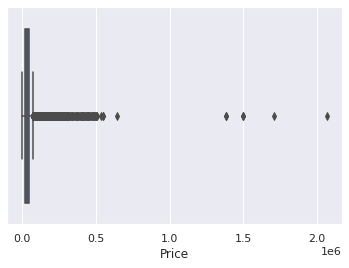

In [ ]:
sns.boxplot(x=data['Price'])

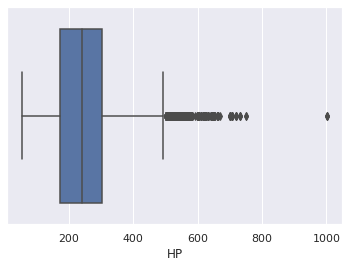

In [ ]:
sns.boxplot(x=data['HP'])

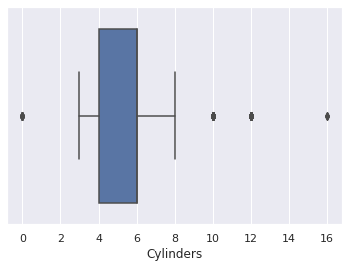

In [ ]:
sns.boxplot(x=data['Cylinders'])

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q1)
print(Q3)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64
Year          2007.0
HP             173.0
Cylinders        4.0
MPG-H           22.0
MPG-C           16.0
Price        21972.5
Name: 0.25, dtype: float64
Year          2016.0
HP             303.0
Cylinders        6.0
MPG-H           30.0
MPG-C           22.0
Price        43300.0
Name: 0.75, dtype: float64


In [ ]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
data.shape

(9191, 10)

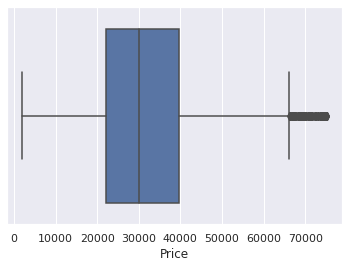

In [ ]:
sns.boxplot(x=data['Price'])

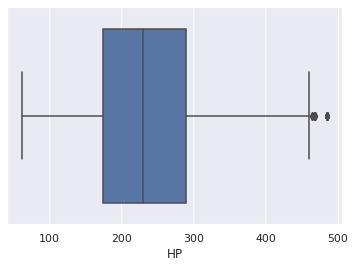

In [ ]:
sns.boxplot(x=data['HP'])

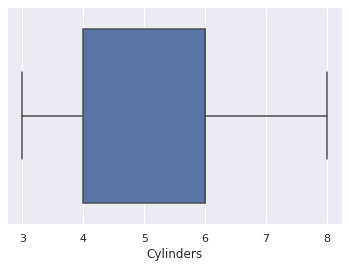

In [ ]:
sns.boxplot(x=data['Cylinders'])

## 10. Histogram

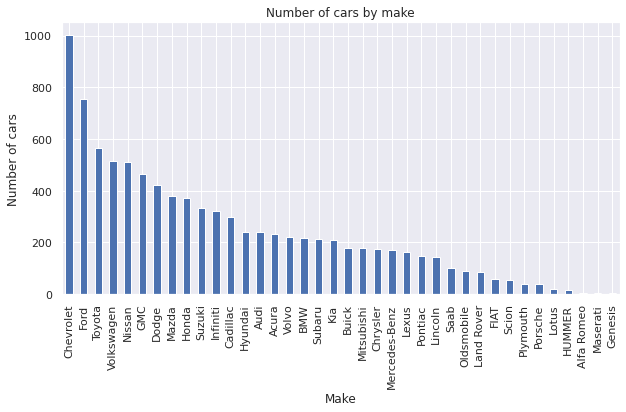

In [ ]:
data.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

In [ ]:
data['Year'].describe()

count    9191.000000
mean     2011.328909
std         6.276064
min      1994.000000
25%      2008.000000
50%      2015.000000
75%      2016.000000
max      2017.000000
Name: Year, dtype: float64

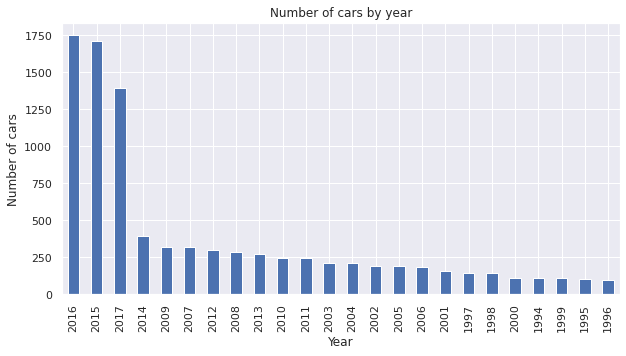

In [ ]:
data.Year.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by year")
plt.ylabel('Number of cars')
plt.xlabel('Year');

## 11. Heat map

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


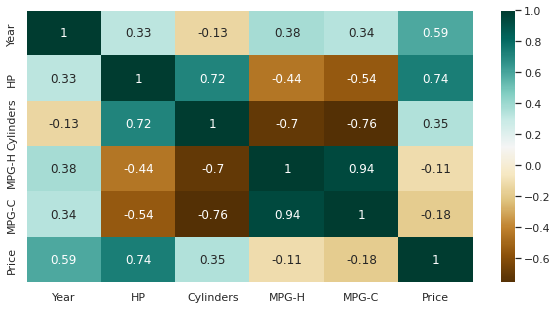

In [ ]:
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## 12. Scatterplot

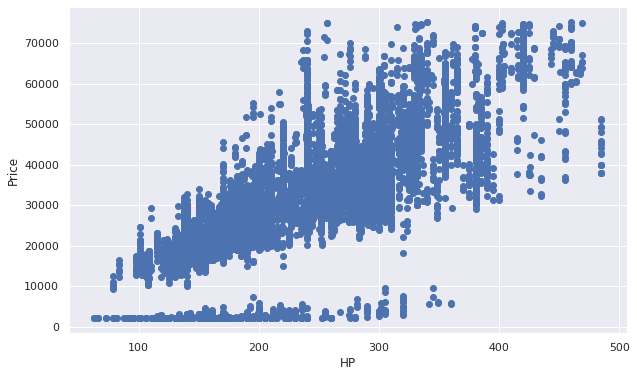

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['HP'], data['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()